In [2]:
#Imports
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Load data
adata_path = '/home/miklos_boldogkoi_iob_ch/Documents/data_analysis_course/session2/input_data/adata_course_part1.h5ad'
adata = sc.read_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 14878 × 22546
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'fraction_mito', 'n_genes', 'num_spliced', 'num_ambiguous', 'num_unspliced', 'fraction_spliced', 'is_cell', 'is_high_quality', 'is_nonambient', 'is_not_debris', 'soupc_rho', 'sample'
    var: 'gene_ids', 'feature_types', 'soup_profile'
    layers: 'X_beforeAmbientRemoval', 'ambiguous', 'spliced', 'unspliced'

In [4]:
display(adata.obs.head())
display(adata.var.head())

,initial_size_spliced,initial_size_unspliced,initial_size,fraction_mito,n_genes,num_spliced,num_ambiguous,num_unspliced,fraction_spliced,is_cell,is_high_quality,is_nonambient,is_not_debris,soupc_rho,sample
AAACCCAAGTTGGCGA-rd10,5801,2365,5801,0.053433,3142,5727,558,2365,0.662081,1,1,1,1,0.241,rd10
AAACCCACAGAAACCG-rd10,1352,1174,1352,0.029447,1071,1337,153,1174,0.501877,1,1,1,1,0.241,rd10
AAACCCAGTGCCGTAC-rd10,1007,886,1007,0.039137,935,996,99,886,0.502776,1,1,1,1,0.241,rd10
AAACCCATCGCGCCAA-rd10,1652,2560,1652,0.120705,1409,1605,234,2560,0.364856,1,1,1,1,0.241,rd10
AAACGAAAGCAACCAG-rd10,1528,1564,1528,0.031646,1360,1517,158,1564,0.468354,1,1,1,1,0.241,rd10


,gene_ids,feature_types,soup_profile
Pcmtd1,ENSMUSG00000051285,Gene Expression,6.692449e-05
Cdh7,ENSMUSG00000026312,Gene Expression,1.499708e-06
Exo1,ENSMUSG00000039748,Gene Expression,1.874636e-07
Becn2,ENSMUSG00000104158,Gene Expression,0.000000e+00
Uxs1,ENSMUSG00000057363,Gene Expression,9.935569e-06


In [5]:
print('unspliced:', adata.layers['unspliced'][5247, 16984])
print('spliced: ', adata.layers['spliced'][5247, 16984])
print('gene: ', adata.var_names[16984])

unspliced: 13
spliced:  5771
gene:  Cartpt


In [6]:
total = adata.obs['sample'].size
rd10 = adata.obs['sample'].value_counts()[1]
percentage = rd10/total * 100
print('Number of cells: ', total)
print('Number of genes: ', adata.X.shape[1])
print('rd10% = ', percentage)

Number of cells:  14878
Number of genes:  22546
rd10% =  46.22933189944885


In [7]:
mean_soup = np.mean(adata.var['soup_profile'])
print('Mean soup: ', mean_soup)

max_soup = adata.var['soup_profile'].sort_values(ascending=False).head()
print('Highest soup gene: ', max_soup.index[0])

Mean soup:  4.435376563470239e-05
Highest soup gene:  Hbb-bs


In [8]:
total_trscripts = adata.X.sum(axis=1)
print(total_trscripts.shape)

adata.obs['Total_RNA_Count'] = total_trscripts

print(max(total_trscripts))
print(min(total_trscripts))


(14878, 1)
[[38969.19099069]]
[[751.42498848]]


Text(0, 0.5, 'Frequency')

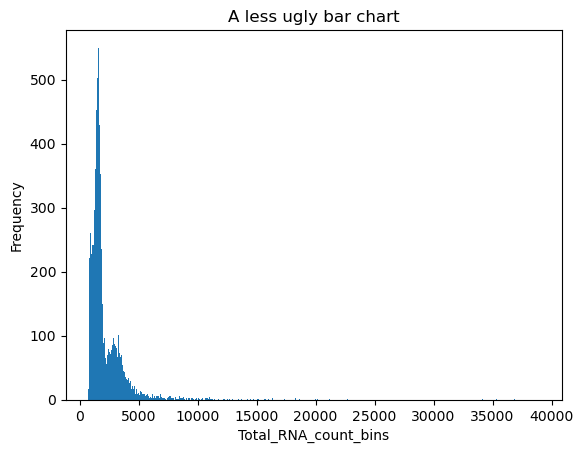

In [9]:
#plot
plt.hist(adata.obs['Total_RNA_Count'], bins=1000)
plt.title('A less ugly bar chart')
plt.xlabel('Total_RNA_count_bins')
plt.ylabel('Frequency')


In [18]:
max_fraction_mito = adata.obs['fraction_mito'].mean() + 2 * adata.obs['fraction_mito'].std()
print(max_fraction_mito)


0.08764821290969849


Snakemake

Keeping the VM busy

In [10]:
# def prime_factors(n):
#     factors = []
#     # Check for number of 2s that divide n
#     while n % 2 == 0:
#         factors.append(2)
#         n = n // 2

#     # n must be odd at this point so a skip of 2 (i = i + 2) can be used
#     for i in range(3, int(n**0.5) + 1, 2):
#         # While i divides n, add i and divide n
#         while n % i == 0:
#             factors.append(i)
#             n = n // i

#     # Condition if n is a prime number greater than 2
#     if n > 2:
#         factors.append(n)

#     return factors

# # Example usage
# number = 315
# print(f"The prime factors of {number} are: {prime_factors(number)}")



The prime factors of 315 are: [3, 3, 5, 7]


0.09692488367085474


In [12]:
p1 = prime_factors(1748724807438792467)

In [13]:
print(p1)
prime_factors(1000000000)

[1748724807438792467]


[2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5]